In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import pandas as pd
import scienceplots
import seaborn as sns

plt.style.use(["science", "no-latex"])
my_style = {
    "text.usetex": False,
    "figure.constrained_layout.use": True,
    "figure.autolayout": False,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.015,
    "font.size": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "axes.titlesize": 14,
}
plt.rcParams.update(my_style)

In [2]:
import glob
import os

import pandas as pd

In [3]:
def read_csv_files(file_pattern):
    all_data = []
    for file in glob.glob(file_pattern):
        df = pd.read_csv(file)

        # Check if the file contains multiple datasets (4 rows) or single dataset (2 rows)
        if len(df) == 4:
            # Handle special case with multiple datasets
            df["Dataset"] = df["Method"].apply(lambda x: x.split()[-1])
            df["Method"] = df["Method"].apply(lambda x: x.split()[0])
        elif len(df) == 2:
            # Handle standard case
            dataset_name = df["Method"].iloc[0].split()[-1].replace("_dataset", "")
            df["Dataset"] = dataset_name
            if "_train.csv" in str(file):
                df["Dataset"] = dataset_name + "-train"
            if "_test.csv" in str(file):
                df["Dataset"] = dataset_name + "-test"
                
            df["Method"] = df["Method"].apply(lambda x: x.split()[0])
        else:
            print(f"Warning: Unexpected number of rows ({len(df)}) in file: {file}")

        all_data.append(df)
    return pd.concat(all_data, ignore_index=True)


def process_image_metrics_data(df):
    df = df[~df["Method"].isin(["Transformation", "Method"])]
    df = df.dropna().reset_index(drop=True)
    return df


def create_formatted_dataframe(df):
    metrics = ["NMSE", "PSNR", "SSI"]

    # Create MultiIndex columns
    column_tuples = [(metric, method) for metric in metrics for method in ["PCA", "POLCA"]]
    columns = pd.MultiIndex.from_tuples(column_tuples)

    # Create the new DataFrame
    formatted_data = []

    for dataset in df["Dataset"].unique():
        dataset_df = df[df["Dataset"] == dataset]
        new_row = {}
        for metric in metrics:
            pca_value = dataset_df[dataset_df["Method"] == "PCA"][metric].values[0]
            polca_value = dataset_df[dataset_df["Method"] == "POLCA"][metric].values[0]
            new_row[(metric, "PCA")] = pca_value
            new_row[(metric, "POLCA")] = polca_value
        formatted_data.append(new_row)

    formatted_df = pd.DataFrame(formatted_data, columns=columns)

    # Set index
    formatted_df.index = df["Dataset"].unique()
    formatted_df.index.name = "Dataset"

    return formatted_df

In [4]:
# Main execution
raw_image_metrics = read_csv_files("experiments/*/image_metrics_*.csv")
image_metrics = process_image_metrics_data(raw_image_metrics)
formatted_df = create_formatted_dataframe(image_metrics)
print("\nFormatted DataFrame:")
formatted_df


Formatted DataFrame:


NMSE             PSNR              SSI        
                         PCA   POLCA      PCA    POLCA     PCA   POLCA
Dataset                                                               
organcmnist-test      0.2498  0.2737  18.5323  17.8769  0.3350  0.3250
organcmnist-train     0.2494  0.2051  18.0142  19.5939  0.3260  0.4372
chestmnist-test       0.1561  0.1241  21.8086  23.8104  0.6981  0.7718
chestmnist-train      0.1572  0.1234  21.7617  23.8580  0.6962  0.7724
organsmnist-test      0.2519  0.2738  18.4853  17.8883  0.3227  0.3070
organsmnist-train     0.2527  0.2198  18.0783  19.1605  0.3196  0.3948
sinusoidal-test       0.1872  0.0083  20.5247  47.6907  0.8373  0.9996
sinusoidal-train      0.1825  0.0049  20.8421  51.5622  0.8403  0.9999
pathmnist-test        0.1093  0.1191  23.6631  22.7707  0.5425  0.4930
pathmnist-train       0.1110  0.1161  23.5735  23.1386  0.5134  0.4669
breastmnist-test      0.2264  0.3074  21.5383  20.7257  0.4154  0.4255
breastmnist-train     0.2208  0.0046  21.8762  59.8831  0.4461  0.9991
bloodmnist-test       0.0990  0.0975  22.8561  23.0386  0.6043  0.6108
bloodmnist-train      0.0982  0.0870  22.9264  23.9685  0.6093  0.6566
dermamnist-test       0.0961  0.0883  24.8443  25.7175  0.6851  0.7047
dermamnist-train      0.0953  0.0818  24.8609  26.2724  0.6871  0.7155
mnist-test            0.3824  0.2040  18.2803  23.7664  0.6685  0.8882
mnist-train           0.3906  0.2010  18.1791  23.9491  0.6634  0.8900
pneumoniamnist-test   0.1174  0.1257  23.7705  23.2871  0.6446  0.6685
pneumoniamnist-train  0.1119  0.0898  24.0399  25.8575  0.6493  0.7212
organamnist-test      0.2719  0.2920  17.8179  17.3102  0.3081  0.2967
organamnist-train     0.2727  0.2111  17.5832  19.5810  0.3194  0.4528
octmnist-test         0.3429  0.2306  20.6615  24.3299  0.4977  0.6661
octmnist-train        0.3599  0.2373  21.1097  24.9215  0.5524  0.7344
cifar10-test          0.2390  0.2355  18.7233  18.8588  0.4358  0.4493
cifar10-train         0.2402  0.2355  18.7293  18.9058  0.4366  0.4537
retinamnist-test      0.1500  0.1491  26.9707  27.2043  0.8212  0.8378
retinamnist-train     0.1427  0.0960  27.1014  30.5064  0.8259  0.8904
bent-test             0.2373  0.0256  17.8147  38.0171  0.8409  0.9974
bent-train            0.2157  0.0049  18.6662  51.3852  0.8708  0.9999
fmnist-test           0.3580  0.2583  17.1477  20.4228  0.5325  0.6983
fmnist-train          0.3585  0.2556  17.1596  20.5273  0.5332  0.7033

In [5]:
# Step 1: Create a function to split the index
def split_index(idx):
    if idx.endswith('-test'):
        return idx[:-5], 'test'
    elif idx.endswith('-train'):
        return idx[:-6], 'train'
    else:
        return idx, 'unknown'

# Step 2: Apply the function to create new level values
dataset_names, splits = zip(*formatted_df.index.map(split_index))

# Step 3: Create a new MultiIndex
new_index = pd.MultiIndex.from_arrays([dataset_names, splits], names=['Dataset', 'Split'])

# Step 4: Set the new index to the DataFrame
formatted_df.index = new_index
formatted_df

NMSE             PSNR              SSI        
                         PCA   POLCA      PCA    POLCA     PCA   POLCA
Dataset        Split                                                  
organcmnist    test   0.2498  0.2737  18.5323  17.8769  0.3350  0.3250
               train  0.2494  0.2051  18.0142  19.5939  0.3260  0.4372
chestmnist     test   0.1561  0.1241  21.8086  23.8104  0.6981  0.7718
               train  0.1572  0.1234  21.7617  23.8580  0.6962  0.7724
organsmnist    test   0.2519  0.2738  18.4853  17.8883  0.3227  0.3070
               train  0.2527  0.2198  18.0783  19.1605  0.3196  0.3948
sinusoidal     test   0.1872  0.0083  20.5247  47.6907  0.8373  0.9996
               train  0.1825  0.0049  20.8421  51.5622  0.8403  0.9999
pathmnist      test   0.1093  0.1191  23.6631  22.7707  0.5425  0.4930
               train  0.1110  0.1161  23.5735  23.1386  0.5134  0.4669
breastmnist    test   0.2264  0.3074  21.5383  20.7257  0.4154  0.4255
               train  0.2208  0.0046  21.8762  59.8831  0.4461  0.9991
bloodmnist     test   0.0990  0.0975  22.8561  23.0386  0.6043  0.6108
               train  0.0982  0.0870  22.9264  23.9685  0.6093  0.6566
dermamnist     test   0.0961  0.0883  24.8443  25.7175  0.6851  0.7047
               train  0.0953  0.0818  24.8609  26.2724  0.6871  0.7155
mnist          test   0.3824  0.2040  18.2803  23.7664  0.6685  0.8882
               train  0.3906  0.2010  18.1791  23.9491  0.6634  0.8900
pneumoniamnist test   0.1174  0.1257  23.7705  23.2871  0.6446  0.6685
               train  0.1119  0.0898  24.0399  25.8575  0.6493  0.7212
organamnist    test   0.2719  0.2920  17.8179  17.3102  0.3081  0.2967
               train  0.2727  0.2111  17.5832  19.5810  0.3194  0.4528
octmnist       test   0.3429  0.2306  20.6615  24.3299  0.4977  0.6661
               train  0.3599  0.2373  21.1097  24.9215  0.5524  0.7344
cifar10        test   0.2390  0.2355  18.7233  18.8588  0.4358  0.4493
               train  0.2402  0.2355  18.7293  18.9058  0.4366  0.4537
retinamnist    test   0.1500  0.1491  26.9707  27.2043  0.8212  0.8378
               train  0.1427  0.0960  27.1014  30.5064  0.8259  0.8904
bent           test   0.2373  0.0256  17.8147  38.0171  0.8409  0.9974
               train  0.2157  0.0049  18.6662  51.3852  0.8708  0.9999
fmnist         test   0.3580  0.2583  17.1477  20.4228  0.5325  0.6983
               train  0.3585  0.2556  17.1596  20.5273  0.5332  0.7033

In [6]:
# Generate LaTeX table
latex_table = formatted_df.to_latex(
    multirow=True,
    multicolumn=True,
    caption="Image Metrics Comparison",
    label="tab:image_metrics_comparison",
    position="htbp",
    float_format="%.4f",
    column_format="lrrrrrr",
)
print(latex_table)
# with open("experiments/image_metrics_comparison.tex", "w") as f:
#     f.write(latex_table)

\begin{table}[htbp]
\caption{Image Metrics Comparison}
\label{tab:image_metrics_comparison}
\begin{tabular}{lrrrrrr}
\toprule
 &  & \multicolumn{2}{r}{NMSE} & \multicolumn{2}{r}{PSNR} & \multicolumn{2}{r}{SSI} \\
 &  & PCA & POLCA & PCA & POLCA & PCA & POLCA \\
Dataset & Split &  &  &  &  &  &  \\
\midrule
\multirow[t]{2}{*}{organcmnist} & test & 0.2498 & 0.2737 & 18.5323 & 17.8769 & 0.3350 & 0.3250 \\
 & train & 0.2494 & 0.2051 & 18.0142 & 19.5939 & 0.3260 & 0.4372 \\
\cline{1-8}
\multirow[t]{2}{*}{chestmnist} & test & 0.1561 & 0.1241 & 21.8086 & 23.8104 & 0.6981 & 0.7718 \\
 & train & 0.1572 & 0.1234 & 21.7617 & 23.8580 & 0.6962 & 0.7724 \\
\cline{1-8}
\multirow[t]{2}{*}{organsmnist} & test & 0.2519 & 0.2738 & 18.4853 & 17.8883 & 0.3227 & 0.3070 \\
 & train & 0.2527 & 0.2198 & 18.0783 & 19.1605 & 0.3196 & 0.3948 \\
\cline{1-8}
\multirow[t]{2}{*}{sinusoidal} & test & 0.1872 & 0.0083 & 20.5247 & 47.6907 & 0.8373 & 0.9996 \\
 & train & 0.1825 & 0.0049 & 20.8421 & 51.5622 & 0.8403 & 0.99

In [7]:
# Reshape the DataFrame
df_long = (
    formatted_df.stack(level=[0, 1], future_stack=True)
    .reset_index()
    .rename(columns={"level_2": "Metric", "level_3": "Method", 0: "Value"})
)
df_long

,Dataset,Split,Metric,Method,Value
0,organcmnist,test,NMSE,PCA,0.2498
1,organcmnist,test,NMSE,POLCA,0.2737
2,organcmnist,test,PSNR,PCA,18.5323
3,organcmnist,test,PSNR,POLCA,17.8769
4,organcmnist,test,SSI,PCA,0.3350
...,...,...,...,...,...
187,fmnist,train,NMSE,POLCA,0.2556
188,fmnist,train,PSNR,PCA,17.1596
189,fmnist,train,PSNR,POLCA,20.5273
190,fmnist,train,SSI,PCA,0.5332


In [8]:
# df_long["Method"] =  df_long["Method"] +"-"+ df_long["Split"]

In [9]:
df_long

,Dataset,Split,Metric,Method,Value
0,organcmnist,test,NMSE,PCA,0.2498
1,organcmnist,test,NMSE,POLCA,0.2737
2,organcmnist,test,PSNR,PCA,18.5323
3,organcmnist,test,PSNR,POLCA,17.8769
4,organcmnist,test,SSI,PCA,0.3350
...,...,...,...,...,...
187,fmnist,train,NMSE,POLCA,0.2556
188,fmnist,train,PSNR,PCA,17.1596
189,fmnist,train,PSNR,POLCA,20.5273
190,fmnist,train,SSI,PCA,0.5332


In [10]:
from sklearn.preprocessing import minmax_scale
def min_max_metric(df_in, metric):
    df = pd.DataFrame(df_in.copy())
    # Applying min-max normalization
    df.loc[df["Metric"] == metric, "Value"] = minmax_scale(df[df["Metric"] == metric]["Value"], feature_range=(0., 1.))
    return df

In [11]:
df = pd.DataFrame(df_long.copy())

In [12]:
# df = min_max_metric(df,"NMSE")
# df = min_max_metric(df,"PSNR")
# df = min_max_metric(df,"SSI")

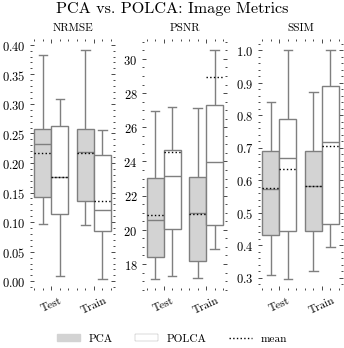

In [25]:
fig, axs = plt.subplots(1,3,figsize=(3.5, 3.5))
for ax,metric,title in zip(axs,["NMSE","PSNR","SSI"],["NRMSE","PSNR","SSIM"]):
    ax = sns.boxplot(
        data=df[df["Metric"]==metric],
        x="Split",
        y="Value",
        hue="Method",    
        fill=True,
        palette={"PCA": "lightgray", "POLCA": "white"},
        gap=0.0,
        showmeans=True,
        meanprops={"ls":":","c":"k"},
        meanline=True,
        showfliers=False,
        fliersize= 0.5,
        ax=ax,  
        legend=False,       
    )
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(title,fontsize="xx-small")   
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Test","Train"], rotation=25, ha="center", fontsize="xx-small")
   

plt.suptitle("PCA vs. POLCA: Image Metrics", fontsize="small")
PCA_patch = mpatches.Patch(color='lightgray', label='PCA',)
POLCA_patch = mpatches.Patch(facecolor='white', label='POLCA',edgecolor="k",lw=0.1)
means_leg = mlines.Line2D([], [],ls=":", color='k', marker=None, markersize=15, label='mean')
fig.legend(handles=[PCA_patch, POLCA_patch,means_leg],loc='outside lower center',fontsize="xx-small",ncols=3, borderaxespad=0.)
# Tweak the visual presentation
sns.despine(trim=True, left=True, right=True, top=True, bottom=True)
plt.savefig("experiments/image_metrics_comparison_boxplot.pdf", dpi=300, bbox_inches="tight")